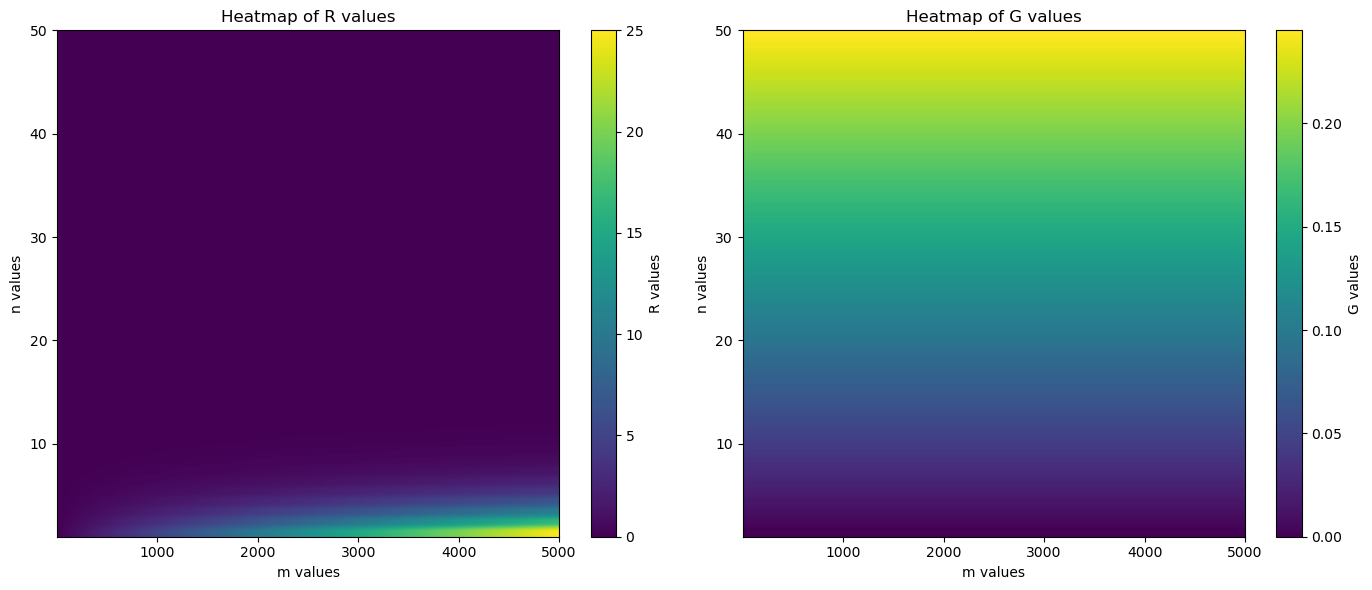

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ranges for n and m
n_values = np.arange(1, 51)  # n ranges from 1 to 50
m_values = np.arange(1, 5001)  # m ranges from 1 to 5000

# Define fixed parameters
p = 0.5  # Example probability value, can be adjusted
lambda_value = 0.005  # Example decay rate, can be adjusted

# Initialize arrays to store R and G values
R_values = np.zeros((len(n_values), len(m_values)))
G_values = np.zeros((len(n_values), len(m_values)))

# Compute R and G for each combination of n and m
for i, n in enumerate(n_values):
    for j, m in enumerate(m_values):
        R = m * n * p * lambda_value * ((1 - p) ** (n - 1)) / (1 - (1 - p) ** n)
        G = lambda_value * (n - 1) / (1/p - 1)
        R_values[i, j] = R
        G_values[i, j] = G

# Plotting the results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(R_values, extent=[m_values.min(), m_values.max(), n_values.min(), n_values.max()], aspect='auto', origin='lower')
plt.colorbar(label='R values')
plt.xlabel('m values')
plt.ylabel('n values')
plt.title('Heatmap of R values')

plt.subplot(1, 2, 2)
plt.imshow(G_values, extent=[m_values.min(), m_values.max(), n_values.min(), n_values.max()], aspect='auto', origin='lower')
plt.colorbar(label='G values')
plt.xlabel('m values')
plt.ylabel('n values')
plt.title('Heatmap of G values')

plt.tight_layout()
plt.show()


Version 2

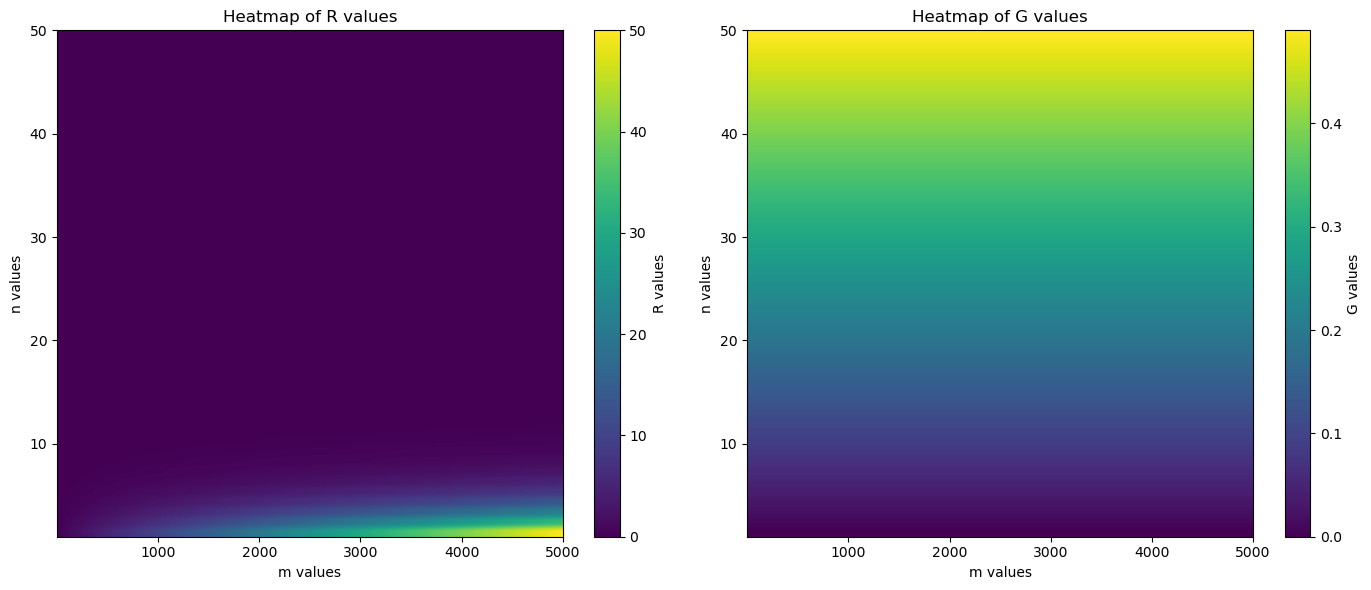

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ranges for n and m
n_values = np.arange(1, 51)  # n ranges from 1 to 50
m_values = np.arange(1, 5001)  # m ranges from 1 to 5000

# Define fixed parameters
p = 0.5  # Example probability value, can be adjusted
lambda_value = 0.01  # Example decay rate, can be adjusted

# Initialize arrays to store R and G values
R_values = np.zeros((len(n_values), len(m_values)))
G_values = np.zeros((len(n_values), len(m_values)))

# Compute R and G for each combination of n and m
for i, n in enumerate(n_values):
    for j, m in enumerate(m_values):
        t0 = (1 - p) / (p * lambda_value)  # Correct formula for t0
        # Correct formula for R
        R = m * n * p * lambda_value * ((1 - p) ** (n - 1)) / (1 - (1 - p) ** n)
        # Correct formula for G
        G = lambda_value * (n - 1) / (1/p - 1)
        R_values[i, j] = R
        G_values[i, j] = G

# Plotting the results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(R_values, extent=[m_values.min(), m_values.max(), n_values.min(), n_values.max()], aspect='auto', origin='lower')
plt.colorbar(label='R values')
plt.xlabel('m values')
plt.ylabel('n values')
plt.title('Heatmap of R values')

plt.subplot(1, 2, 2)
plt.imshow(G_values, extent=[m_values.min(), m_values.max(), n_values.min(), n_values.max()], aspect='auto', origin='lower')
plt.colorbar(label='G values')
plt.xlabel('m values')
plt.ylabel('n values')
plt.title('Heatmap of G values')

plt.tight_layout()
plt.show()


To achieve R values in the range of 0.0005 to 0.005 and  G values in the range of 0.01 to 0.25, we need to experiment with the ranges of n, m, lamba, p. Let's fine-tune these parameters and find suitable ranges through systematic adjustments and calculations.

modify the above code to save the m, n, lamba, and p values for  appropriate R values in the desired range and  appropriate G values in the desired range.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define ranges for n and m to explore
n_values = np.arange(1, 51, 5)  # n ranges from 1 to 50
m_values = np.arange(1, 5001, 50)  # m ranges from 1 to 5000

# Parameters to be adjusted
p_values = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4]  # Adjust p to find suitable values
lambda_values = np.linspace(0.001, 0.005, 0.01, 0.02)  # Adjust lambda to find suitable values

# Initialize lists to store appropriate values
appropriate_R = []
appropriate_G = []

# Iterate through the parameter space
for p in p_values:
    for lambda_value in lambda_values:
        for n in n_values:
            for m in m_values:
                R = m * n * p * lambda_value * ((1 - p) ** (n - 1)) / (1 - (1 - p) ** n)
                G = lambda_value * (n - 1) / (1/p - 1)
                if 0.0005 <= R <= 0.005:
                    appropriate_R.append((m, n, p, lambda_value, R))
                if 0.01 <= G <= 0.25:
                    appropriate_G.append((m, n, p, lambda_value, G))

# Convert lists to DataFrames
df_R = pd.DataFrame(appropriate_R, columns=['m', 'n', 'p', 'lambda', 'R'])
df_G = pd.DataFrame(appropriate_G, columns=['m', 'n', 'p', 'lambda', 'G'])

# Save DataFrames to CSV files
df_R.to_csv('appropriate_R_values.csv', index=False)
df_G.to_csv('appropriate_G_values.csv', index=False)

print(f"Found {len(appropriate_R)} appropriate R values in the desired range.")
print(f"Found {len(appropriate_G)} appropriate G values in the desired range.")
print("Saved appropriate values to CSV files.")

# Plotting some of the appropriate values to visualize
if appropriate_R:
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(df_R['n'], df_R['R'], alpha=0.7)
    plt.xlabel('n values')
    plt.ylabel('R values')
    plt.title('Scatter plot of appropriate R values')

    plt.subplot(1, 2, 2)
    plt.scatter(df_G['n'], df_G['G'], alpha=0.7)
    plt.xlabel('n values')
    plt.ylabel('G values')
    plt.title('Scatter plot of appropriate G values')

    plt.tight_layout()
    plt.show()
else:
    print("No appropriate values found within the given parameter ranges.")
